# 1. Importing Libraries and Loading Data

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
import mysql.connector as ms
import datetime

import warnings
warnings.filterwarnings('ignore')

In [95]:
df_info_clients = pd.read_csv('data/clien_info_right.csv')
df_info_clients.drop(['Unnamed: 0'], axis=1, inplace=True)
df_info_clients.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-09-07,...,1,credit_card,2,529.76,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2022-10-28,...,1,credit_card,1,230.34,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2020-08-27,...,1,credit_card,1,674.78,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2019-12-04,...,1,credit_card,7,256.89,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2019-09-20,...,1,credit_card,10,275.76,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


## 1.1) Translating the dataframe

- **Amostra:**  id

- **id_cliente:** client_id

- **id_unico_cliente:**: client_specific_id

- **item-id:** item_id

- **cep_cliente:** client _postal_code

- **cidade cliente:** client_city

- **estado_cliente:** client_state

- **id_pedido:** order_id

- **status_pedido:** order_status

- **horario pedido:** order_date

- **pedido_aprovado:** order_approved (date and time that the order was approved)

- **pedido_entregador:** order_dliveryman (date and time that the order was leaving for delivery)

- **pedido_entregue:** order_delivery (date and time that the order was delivery to the client)

- **data_estimada:** order_estimated (estimate date that the order will arrive to the client)

- **id_vendedor:** salesman_id

- **preco:** order_price (price of the order in reais (R$))

- **frete:** delivery_price

- **pagamento_sequencial:** sequence_pay

- **pagamento_tipo:** paymeny_type

- **pagamento_prestacoes:**  divided_pay (number of parcels that the client will pay the order's value)

- **pagamento_valor:** ntotal_price (order's price + dlivery's price)

- **review:** review (stars rating of the client)

- **categoria:** category (product's category)

- **categoria_ingles:** category_english (product's category in english)

- **cep_vendedor:** salesman_postal

- **cidade_vendedor:** salesman_city

- **estado_vendedor:** salesman_state

In [96]:
#Rename the columns
new_columns = [ 'id',  'client_id', 'client_specific_id', 'item_id', 'client _postal_code', 'client_city', 'client_state', 'order_id', 'order_status', 'order_date', 'order_approved', 'order_dliveryman',
               'order_delivery', 'order_estimated', 'salesman_id', 'order_price', 'delivery_price', 'sequence_pay', 'paymeny_type', 'divided_pay', 'total_price', 'review', 'category', 'category_english',
               'salesman_postal', 'salesman_city', 'salesman_state']

df_info_clients.columns = new_columns

# 2) Data Caracteristics

In [97]:
print('Number of Rows: {}'.format( df_info_clients.shape[0] ) )
print( 'Number of Columns: {}'.format( df_info_clients.shape[1] ) )

Number of Rows: 116581
Number of Columns: 27


In [98]:
#type of the columns
print('Data Types')
df_info_clients.dtypes

Data Types


id                       int64
client_id               object
client_specific_id      object
item_id                  int64
client _postal_code      int64
client_city             object
client_state            object
order_id                object
order_status            object
order_date              object
order_approved          object
order_dliveryman        object
order_delivery          object
order_estimated         object
salesman_id             object
order_price            float64
delivery_price         float64
sequence_pay             int64
paymeny_type            object
divided_pay              int64
total_price            float64
review                   int64
category                object
category_english        object
salesman_postal          int64
salesman_city           object
salesman_state          object
dtype: object

In [99]:
# Convert datas from object to date_time
df_info_clients[["order_date"]] = df_info_clients[["order_date"]].apply(pd.to_datetime)
df_info_clients[["order_approved"]] = df_info_clients[["order_approved"]].apply(pd.to_datetime)
df_info_clients[["order_dliveryman"]] = df_info_clients[["order_dliveryman"]].apply(pd.to_datetime)
df_info_clients[["order_delivery"]] = df_info_clients[["order_delivery"]].apply(pd.to_datetime)
df_info_clients[["order_estimated"]] = df_info_clients[["order_estimated"]].apply(pd.to_datetime)

In [100]:
print("Check Null Values")
df_info_clients.isna().sum()

Check Null Values


id                     0
client_id              0
client_specific_id     0
item_id                0
client _postal_code    0
client_city            0
client_state           0
order_id               0
order_status           0
order_date             0
order_approved         0
order_dliveryman       0
order_delivery         0
order_estimated        0
salesman_id            0
order_price            0
delivery_price         0
sequence_pay           0
paymeny_type           0
divided_pay            0
total_price            0
review                 0
category               0
category_english       0
salesman_postal        0
salesman_city          0
salesman_state         0
dtype: int64

#### Exploratory Data Analysis

In [101]:
print("There are "+ str(len(df_info_clients)) + " sales and " +
    str(len(df_info_clients['client_id'].unique())) + 
    " different clients " )

There are 116581 sales and 97255 different clients 


As this is a small percentage, the shop should create more attractive condidtions to estimulates clients to buy a second time

In [102]:
#separate the dataframe for only good clients
df_good_clients = df_info_clients[df_info_clients['client_id'].isin(id_good_clients)]

print("The clients that bought more than once represents " +
str(round((df_good_clients['order_price'].sum()/df_info_clients['order_price'].sum())*100,2))+
"% of the revenue")

The clients that bought more than once represents 27.5% of the revenue


# 3) Classifying  customers

### 3.1) Creating Features

I will create a dataframe of clients with the following features:
- Client ID
- Client State
- Client city 
- Number of orders
- Mean of the price of the order
- Sum of the price: total price of all the orders combine
- Mean of the reviews
- First order date
- Last order date
- Difference between the first and last order date
- Interval: number of days between purchases

In [103]:
df_info_clients['order_date2'] = df_info_clients['order_date'] 
df_info_clients['order_price2'] = df_info_clients['order_price'] 
df_clients = df_info_clients.groupby(['client_id', 'client_state', 'client_city']).agg(
    {'client_id': 'count', 'order_price': 'mean', 'order_price2': 'sum', 'review': 'mean', 'order_date': 'min', 'order_date2': 'max'}).rename(
    columns={'client_id': 'number_orders', 'order_price': 'mean_price', 'order_price2': 'sum_price', 'review': 'mean_review', 'order_date': 'min_order_date', 'order_date2': 'max_order_date'}).reset_index()
df_clients.head()

,client_id,client_state,client_city,number_orders,mean_price,sum_price,mean_review,min_order_date,max_order_date
0,00012a2ce6f8dcda20d059ce98491703,SP,osasco,1,784.72,784.72,1.0,2022-10-04,2022-10-04
1,000161a058600d5901f007fab4c27140,MG,itapecerica,1,930.15,930.15,4.0,2020-07-10,2020-07-10
2,0001fd6190edaaf884bcaf3d49edf079,ES,nova venecia,1,889.38,889.38,5.0,2019-07-22,2019-07-22
3,0002414f95344307404f0ace7a26f1d5,MG,mendonca,1,948.16,948.16,5.0,2019-06-30,2019-06-30
4,000379cdec625522490c315e70c7a9fb,SP,sao paulo,1,782.85,782.85,4.0,2022-06-05,2022-06-05


In [104]:
df_clients['max_order_date'] = pd.to_datetime(df_clients['max_order_date'])
df_clients['min_order_date'] = pd.to_datetime(df_clients['min_order_date'])

In [109]:
#Calculate the number of days between first and the last order
df_clients['diff_days'] = (df_clients['max_order_date'] - df_clients['min_order_date']).dt.days

#Calculate the number of days between purchases
df_clients['interval'] = round(df_clients['diff_days'] / df_clients['number_orders'],2)

#Calculate the number of days since the last pruchase
df_clients['recency'] = datetime.date.today() 
df_clients['recency'] = pd.to_datetime(df_clients['recency'])
df_clients['recency'] = (df_clients['recency'] - df_clients['max_order_date']).dt.days

#Sorting the dataframe in descendant order by the the total spent per client
df_clients = df_clients.sort_values(by='sum_price', ascending=False).reset_index()
df_clients.drop(['index'], axis=1, inplace=True)

In [110]:
df_clients.head()

,client_id,client_state,client_city,number_orders,mean_price,sum_price,mean_review,min_order_date,max_order_date,diff_days,interval,recency
0,270c23a11d024a44c896d1894b261a83,SP,sao paulo,63,548.543333,34558.23,4.460317,2019-01-16,2022-12-25,1439,22.84,80
1,13aa59158da63ba0e93ec6ac2c07aacb,RJ,rio de janeiro,38,458.187895,17411.14,4.500000,2019-01-19,2022-11-27,1408,37.05,108
2,92cd3ec6e2d643d4ebd0e3d6238f69e2,SP,sao paulo,26,642.826538,16713.49,4.500000,2019-01-19,2022-12-27,1438,55.31,78
3,9af2372a1e49340278e7c1ef8d749f34,MT,cuiaba,29,567.928621,16469.93,4.689655,2019-01-16,2022-08-18,1310,45.17,209
4,50920f8cd0681fd86ebe93670c8fe52e,RS,ijui,21,654.687143,13748.43,4.428571,2019-02-19,2022-12-01,1381,65.76,104


### 3.2) Clients' Statistics

- CLientes Totais e analisar os gastos totais
    - Clients que compraram mais de uma vez já sao especiais
        - Desses analisar total gasto, quantidade gasto, mais categorias recorrentes e regiao
        - media +- desvio padrao -> clientes normais
        - outliers -> clientes estrela com tratamento especial
    - CLientes que compraram uma vez
        - media +- desvio padrao -> clientes normais
        - outliers -> clientes estrela com tratamento especial
        - clientes que tem a data de compra mais recente sao mais propensos a comprarem uma segunda vez

#### 3.3.1) Helper Functions

In [ ]:
def statistics_features (col1, df):
    x_mean = df[col1].mean()
    x_median = df[col1].median()
    x_std = df[col1].std()
    x_min = df[col1].min()
    x_max = df[col1].max()

    
    x_stats = pd.DataFrame({'mean': [x_mean],
                            'median': [x_median],
                            'std': [x_std],
                            'min': [x_min],
                            'max': [x_max]})
    x_stats.index = [col1]
    return x_stats

##### Feature: sum_price 

sum_price statistics
                 mean  median         std  min       max
sum_price  659.164129  610.79  540.080369  1.0  34558.23


<Axes: xlabel='sum_price', ylabel='Count'>

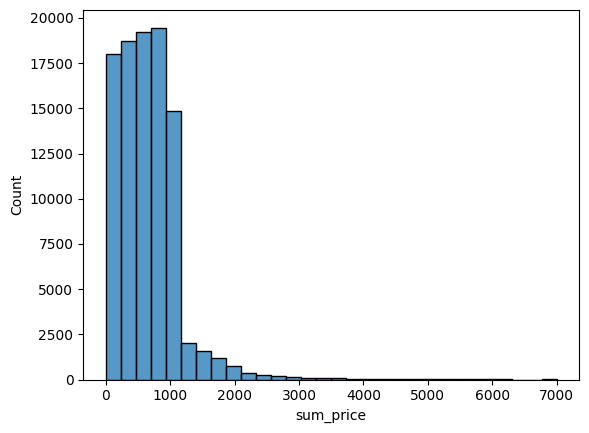

In [ ]:
print("sum_price statistics")
print(statistics_features('sum_price', df_clients))
#Histogram of the total spent of the clients, including all the orders
sns.histplot(df_clients['sum_price'], bins = 30, binrange = (0,7000))

#### 3.3.2) Feature: number_orders

number_orders statistics
                   mean  median      std  min  max
number_orders  1.198715     1.0  0.75133    1   63


<Axes: xlabel='number_orders', ylabel='Count'>

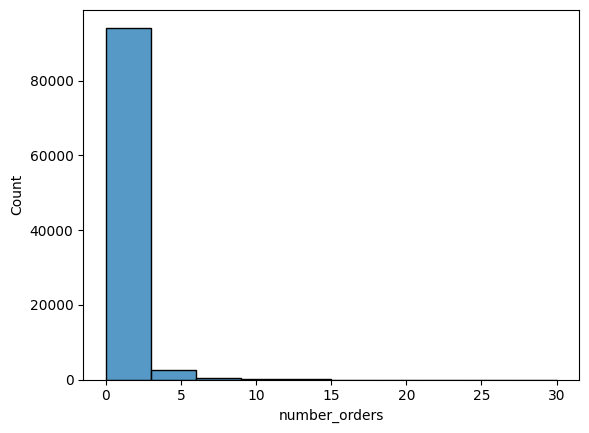

In [ ]:
print("number_orders statistics")
print(statistics_features('number_orders', df_clients))
sns.histplot(df_clients['number_orders'], bins = 10, binrange = (0,30))

#### 3.3.3) Feature: mean_review

review statistics
                 mean  median       std  min  max
mean_review  4.092385     5.0  1.340172  1.0  5.0


<Axes: xlabel='mean_review', ylabel='Count'>

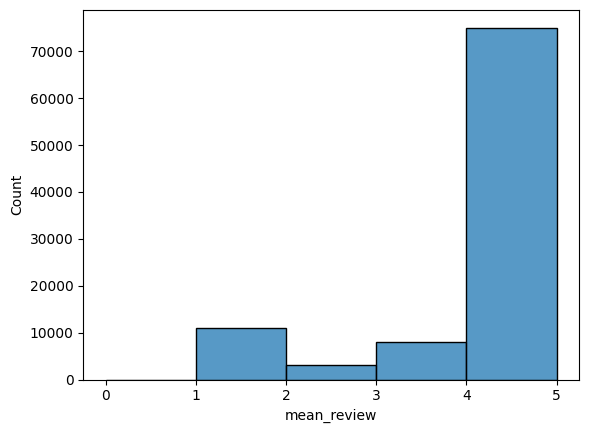

In [ ]:
print("review statistics")
print(statistics_features('mean_review', df_clients))
sns.histplot(df_clients['mean_review'], bins = 5, binrange = (0,5))

#### 3.3.4) Feature: recency

Recency statistics
               mean  median         std  min   max
recency  766.037941   749.0  423.109463   74  1534


<Axes: xlabel='recency', ylabel='Count'>

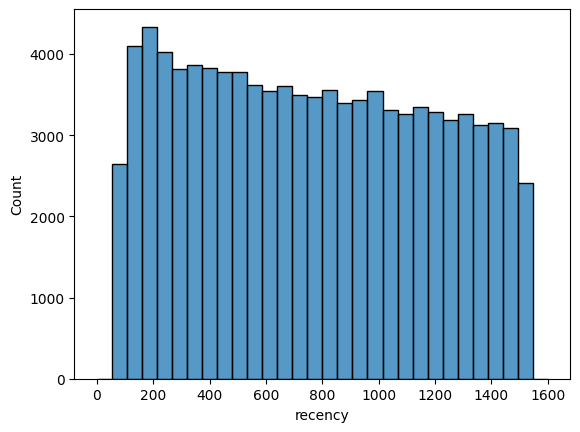

In [117]:
print("Recency statistics")
print(statistics_features('recency', df_clients))
sns.histplot(df_clients['recency'], bins = 30, binrange = (0,1600))

#### 3.3.5) Feature: State

In [ ]:
df_clients['client_state'].value_counts(normalize=True).head()

SP    0.419516
RJ    0.129238
MG    0.116961
RS    0.055020
PR    0.050671
Name: client_state, dtype: float64

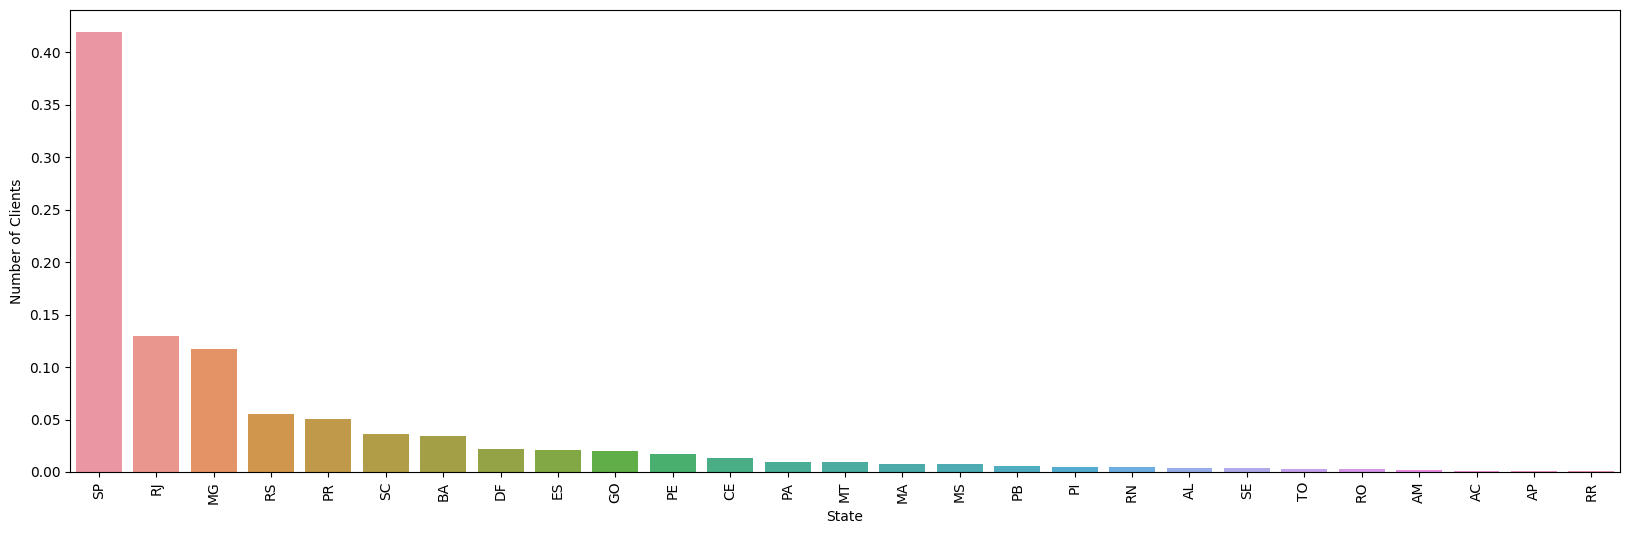

In [ ]:
plt.figure(figsize=(20, 6))

#Create an aux dataframe
aux = df_clients['client_state'].value_counts(normalize=True).sort_values(ascending=False)

# create bar plot of sorted state counts with seaborn
sns.barplot(x=aux.index, y=aux.values)

# set axis labels and rotate x-axis labels
plt.xlabel('State')
plt.ylabel('Number of Clients')
plt.xticks(rotation=90)

# display plot
plt.show()

#### 3.3.6) Feature: City

In [ ]:
df_clients['client_city'].value_counts(normalize=True).head()

sao paulo         0.155827
rio de janeiro    0.069138
belo horizonte    0.027772
brasilia          0.021449
curitiba          0.015372
Name: client_city, dtype: float64

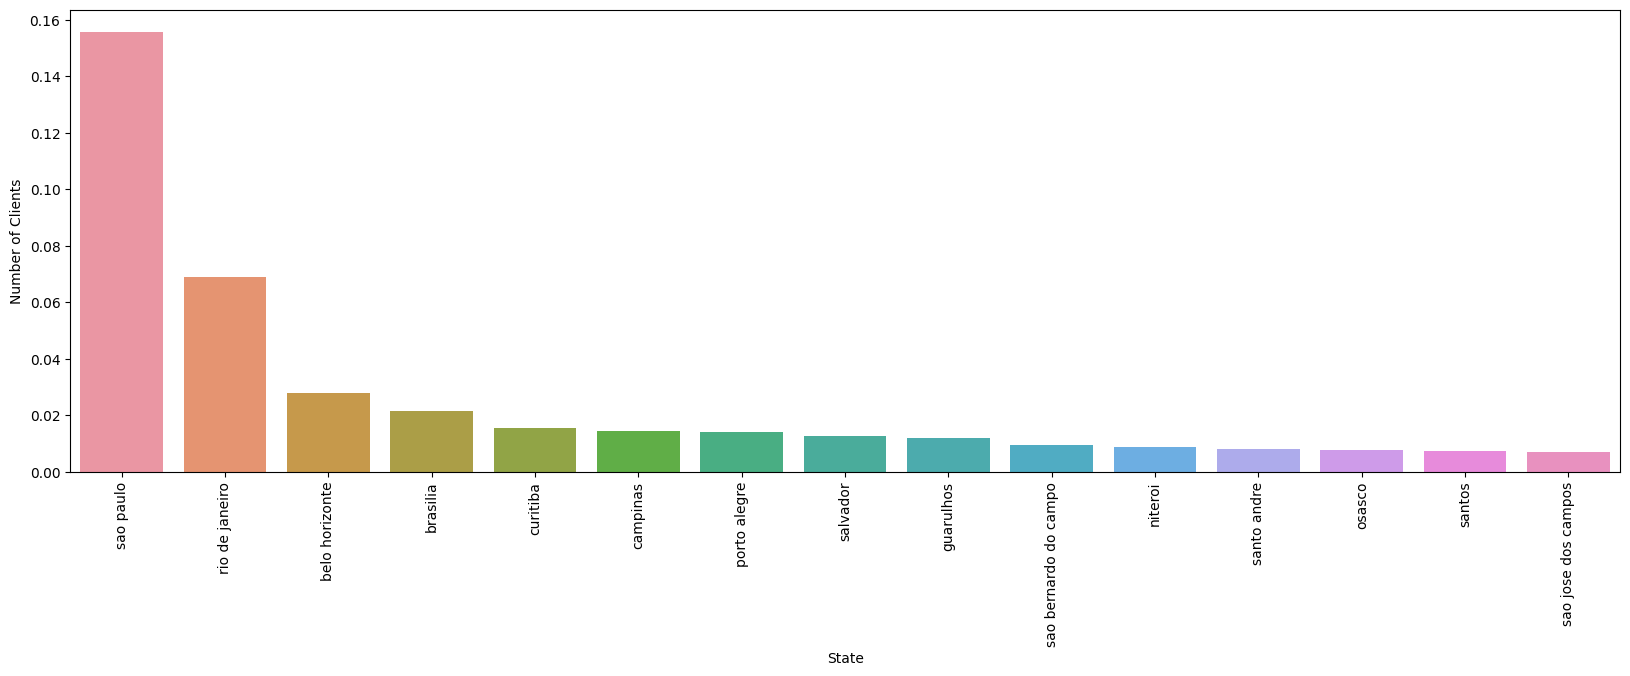

In [ ]:
plt.figure(figsize=(20, 6))

#Create an aux dataframe
aux = df_clients['client_city'].value_counts(normalize=True).sort_values(ascending=False).head(15)

# create bar plot of sorted state counts with seaborn
sns.barplot(x=aux.index, y=aux.values)

# set axis labels and rotate x-axis labels
plt.xlabel('State')
plt.ylabel('Number of Clients')
plt.xticks(rotation=90)

# display plot
plt.show()

### 3.3) Classifying

In [ ]:
#Clients that bought more than once
counts = df_info_clients['client_id'].value_counts()
id_good_clients = counts[counts>1].index.tolist()

print( str(len(id_good_clients)) +
    " clients bought more than once, which represents " +
    str(round(((len(id_good_clients)/len(df_info_clients['client_id'].unique()))*100),2)) +
    "%")


12729 clients bought more than once, which represents 13.09%


We can see that this is a relatively low percetage, so the company should invest in marketing campaigns to attract the clients to buy a second time. 

For this reason, the clients that bought more than once, will be considered in the 2 of the highest classifications: premium and gold

In [ ]:
df_clients[df_clients['number_orders']>1]

,client_id,client_state,client_city,number_orders,mean_price,sum_price,mean_review,min_order_date,max_order_date,diff_days,interval
0,270c23a11d024a44c896d1894b261a83,SP,sao paulo,63,548.543333,34558.23,4.460317,2019-01-16,2022-12-25,1439,22.84
1,13aa59158da63ba0e93ec6ac2c07aacb,RJ,rio de janeiro,38,458.187895,17411.14,4.500000,2019-01-19,2022-11-27,1408,37.05
2,92cd3ec6e2d643d4ebd0e3d6238f69e2,SP,sao paulo,26,642.826538,16713.49,4.500000,2019-01-19,2022-12-27,1438,55.31
3,9af2372a1e49340278e7c1ef8d749f34,MT,cuiaba,29,567.928621,16469.93,4.689655,2019-01-16,2022-08-18,1310,45.17
4,50920f8cd0681fd86ebe93670c8fe52e,RS,ijui,21,654.687143,13748.43,4.428571,2019-02-19,2022-12-01,1381,65.76
...,...,...,...,...,...,...,...,...,...,...,...
94639,3944f41fac367b589b94741981b484d5,GO,valparaiso de goias,2,17.455000,34.91,1.000000,2020-08-11,2021-10-15,430,215.00
94663,d065ae68746a9a4def87315f2af5a5ec,PR,maringa,2,17.250000,34.50,5.000000,2021-06-06,2022-07-20,409,204.50
95905,78756227f125559cd869e1de36480a89,RS,viamao,2,9.155000,18.31,1.000000,2020-07-16,2021-11-23,495,247.50
95998,2b67890640821ea4b35b9c834c41913a,GO,alto paraiso de goias,2,8.595000,17.19,5.000000,2019-07-11,2019-08-02,22,11.00


                   mean  median       std  min  max
number_orders  2.518265     2.0  1.519773    2   63


<Axes: xlabel='number_orders', ylabel='Count'>

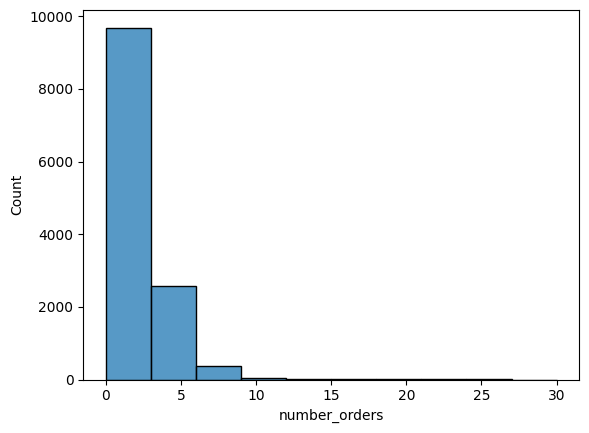

In [ ]:
print(statistics_features('number_orders', df_clients[df_clients['number_orders']>1]))
sns.histplot(df_clients[df_clients['number_orders']>1]['number_orders'], bins = 10, binrange = (0,30))

                  mean   median         std    min       max
sum_price  1384.858741  1230.44  977.495945  13.16  34558.23


<Axes: xlabel='sum_price', ylabel='Count'>

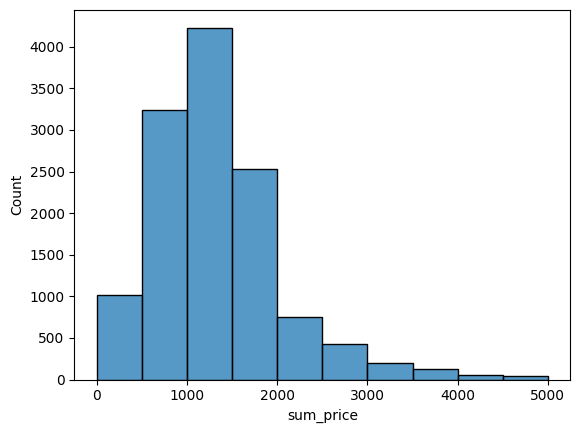

In [ ]:
print(statistics_features('sum_price', df_clients[df_clients['number_orders']>1]))
sns.histplot(df_clients[df_clients['number_orders']>1]['sum_price'], bins = 10, binrange = (0,5000))

               mean  median         std  min   max
recency  512.686385   441.0  333.284612   74  1519


<Axes: xlabel='recency', ylabel='Count'>

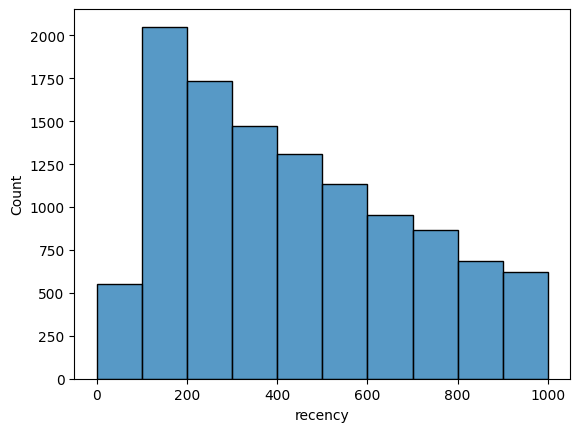

In [119]:
print(statistics_features('recency', df_clients[df_clients['number_orders']>1]))
sns.histplot(df_clients[df_clients['number_orders']>1]['recency'], bins = 10, binrange = (0,1000))

#### 3.3.1) Premium Clients

They are the most exclusive clients and they should benefit with more advantages because they will be the outliers of sum_price and number_orders

outliers = mean + 3*std

In [ ]:
premium_number_orders = round(df_clients['number_orders'].mean()+ 3*df_clients['number_orders'].std())
premium_sum_prices = round(df_clients['sum_price'].mean()+ 3*df_clients['sum_price'].std(),2)

print("Number of orders has to be bigger than "+ str(premium_number_orders)+" or")
print("the client's spents has to be higher than R$"+ str(premium_sum_prices))

Number of orders has to be bigger than 3 or
the client's spents has to be higher than R$2279.41


In [ ]:
df_premium = df_clients[(df_clients['number_orders'] > premium_number_orders) | (df_clients['sum_price'] > premium_sum_prices)]
print(str(len(df_premium))+" clients are premium, which represents only "+ str(round(len(df_premium)/len(df_clients),2)) + "% of the total clients")

1699 clients are premium, which represents only 0.02% of the total clients


#### 3.3.1) Gold Clients

They will be the rest of the clients that bought more than once, that is

In [ ]:
gold_number_orders = round(df_clients['number_orders'].mean()+ 3*df_clients['number_orders'].std())
gold_sum_prices = round(df_clients['sum_price'].mean()+ 3*df_clients['sum_price'].std(),2)

print("Number of orders has to be lower or equal than "+ str(premium_number_orders)+" or")
print("the client's spents has to be lower or equal than R$"+ str(premium_sum_prices))

Number of orders has to be lower or equal than 3 or
the client's spents has to be lower or equal than R$2279.41


In [ ]:
df_gold = df_clients[(df_clients['number_orders'] <= gold_number_orders) | (df_clients['sum_price'] <= gold_sum_prices)]
print(str(len(df_gold))+" clients are premium, which represents only "+ str(round(len(df_gold)/len(df_clients),2)) + "% of the total clients")

96266 clients are premium, which represents only 0.99% of the total clients


# The most Important Features

To defyne the most importanta features, we need to see the correlation between the variables. At first, I will defyne number_orders and sum_price as the most important

### Southeast


In [249]:
df_SE = df_clients[(df_clients['client_state'] == 'SP') | (df_clients['client_state'] == 'RJ') | (df_clients['client_state'] == 'MG')| (df_clients['client_state'] == 'ES')] 

In [252]:
print('The Southeast cities represent ' + 
      str(round(len(df_SE)/len(df_clients),4)*100) + 
      '% of the total orders')

print('The Southeast cities represent ' + 
      str(round(df_SE['sum_price'].sum()/df_clients['sum_price'].sum(),2)*100) + 
      '% of the total spent ')

The Southeast cities represent 68.64% of the total orders
The Southeast cities represent 69.0% of the total spent 


Enconding the Southeast

In [270]:
#Create a colum to indentify if the client is from the southeast or not
df_clients['is_southeast']=0
df_clients.loc[(df_clients['client_state'] == 'SP') | (df_clients['client_state'] == 'RJ') | (df_clients['client_state'] == 'MG') | (df_clients['client_state'] == 'ES'), 'is_southeast'] = 1


In [269]:
df_clients

,client_id,client_state,client_city,number_orders,mean_price,sum_price,mean_review,min_order_date,max_order_date,diff_days,interval,recency,is_southeast
0,270c23a11d024a44c896d1894b261a83,SP,sao paulo,63,548.543333,34558.23,4.460317,2019-01-16,2022-12-25,1439,22.84,80,1
1,13aa59158da63ba0e93ec6ac2c07aacb,RJ,rio de janeiro,38,458.187895,17411.14,4.500000,2019-01-19,2022-11-27,1408,37.05,108,1
2,92cd3ec6e2d643d4ebd0e3d6238f69e2,SP,sao paulo,26,642.826538,16713.49,4.500000,2019-01-19,2022-12-27,1438,55.31,78,1
3,9af2372a1e49340278e7c1ef8d749f34,MT,cuiaba,29,567.928621,16469.93,4.689655,2019-01-16,2022-08-18,1310,45.17,209,0
4,50920f8cd0681fd86ebe93670c8fe52e,RS,ijui,21,654.687143,13748.43,4.428571,2019-02-19,2022-12-01,1381,65.76,104,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97250,3e591ab5fc15cd406033b22ac28393c1,MG,uberaba,1,1.100000,1.10,5.000000,2019-01-03,2019-01-03,0,0.00,1532,1
97251,36bce2699b4c741f2bb5676ea3d5aa88,SP,barueri,1,1.040000,1.04,4.000000,2020-07-15,2020-07-15,0,0.00,973,1
97252,d7a488cd8b2ccbbe2829910897f0f589,RS,pelotas,1,1.010000,1.01,2.000000,2019-08-26,2019-08-26,0,0.00,1297,0
97253,d2f262e4f938b4fe0b5015fa24a2d7a2,RJ,rio de janeiro,1,1.010000,1.01,3.000000,2022-06-06,2022-06-06,0,0.00,282,1


### number_orders: 
We will correlante this feature with: 
- number_orders and mean_price
- number_orders and sum_price
- number_orders and interval
- number_orders and recency

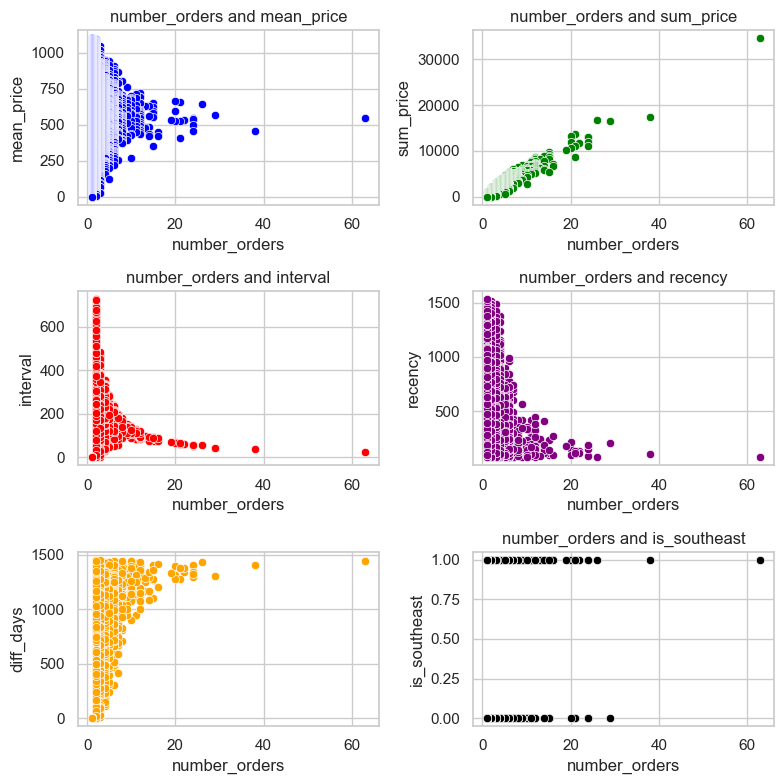

In [276]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

sns.scatterplot(x="number_orders", y="mean_price", data=df_clients, color="blue", ax=axes[0, 0])
axes[0, 0].set_title('number_orders and mean_price')

sns.scatterplot(x="number_orders", y="sum_price", data=df_clients, color="green", ax=axes[0, 1])
axes[0, 1].set_title('number_orders and sum_price')

sns.scatterplot(x="number_orders", y="interval", data=df_clients, color="red", ax=axes[1, 0])
axes[1, 0].set_title('number_orders and interval')

sns.scatterplot(x="number_orders", y="recency", data=df_clients, color="purple", ax=axes[1, 1])
axes[1, 1].set_title('number_orders and recency')

sns.scatterplot(x="number_orders", y="diff_days", data=df_clients, color="orange", ax=axes[2, 0])
axes[2, 1].set_title('number_orders and diff_days')

sns.scatterplot(x="number_orders", y="is_southeast", data=df_clients, color="black", ax=axes[2, 1])
axes[2, 1].set_title('number_orders and is_southeast')

fig.tight_layout()
plt.show()

### sum_price: 
We will correlante this feature with: 
- sum_price and mean_price
- sum_price and interval
- sum_price and recency

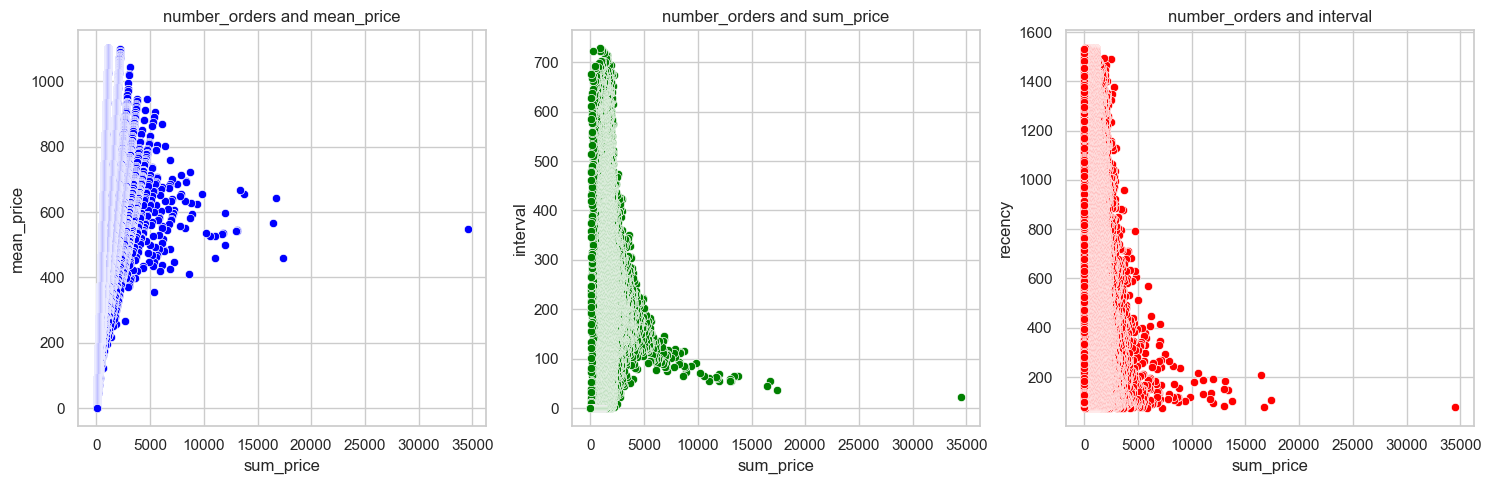

In [155]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.scatterplot(x="sum_price", y="mean_price", data=df_clients, color="blue", ax=axes[0])
axes[0].set_title('number_orders and mean_price')

sns.scatterplot(x="sum_price", y="interval", data=df_clients, color="green", ax=axes[1])
axes[1].set_title('number_orders and sum_price')

sns.scatterplot(x="sum_price", y="recency", data=df_clients, color="red", ax=axes[2])
axes[2].set_title('number_orders and interval')

fig.tight_layout()
plt.show()

### Principal Component Analysis (PCA)

Alternatively we are going to use the PCA algorithm to identify the most important features 

In [164]:
from sklearn.decomposition import PCA

In [221]:
X =df_clients.iloc[:,[3,5,10,11]]

In [231]:
# Instantiate the PCA object with 1 principal component
pca = PCA(n_components=2)

In [232]:
pca.fit(X)

PCA(n_components=2)

In [233]:
X = pca.transform(X)

In [234]:
new_df = pd. DataFrame (X, columns= ['pc1', 'pc2'])

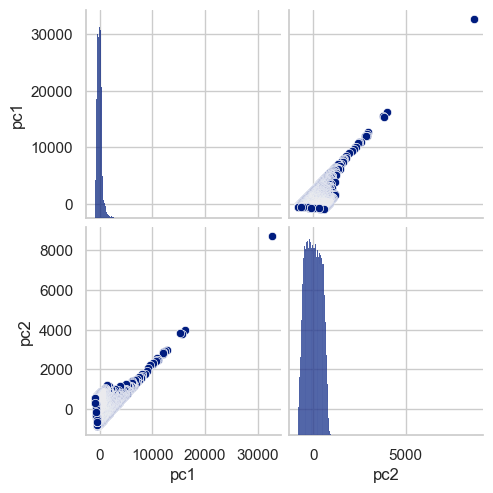

In [236]:
sns.pairplot (
    new_df, vars = ['pc1', 'pc2'],
    diag_kind="hist")
plt.show ()

In [198]:
pca.explained_variance_

array([357666.2990391 , 176982.66425341])

In [199]:
pca.components_

array([[ 8.96147477e-04,  3.36232391e-01,  8.85913971e-01,
        -1.42661781e-04,  2.28413900e-01,  7.36257905e-02,
        -2.10973280e-01],
       [-1.27697871e-04,  2.20326334e-01,  1.79723427e-01,
         5.37276651e-05, -1.26819770e-01, -5.71469033e-02,
         9.48581443e-01]])

In [200]:
pca.explained_variance_ratio_

array([0.56835489, 0.28123691])

In [120]:
df_clients.head()

,client_id,client_state,client_city,number_orders,mean_price,sum_price,mean_review,min_order_date,max_order_date,diff_days,interval,recency
0,270c23a11d024a44c896d1894b261a83,SP,sao paulo,63,548.543333,34558.23,4.460317,2019-01-16,2022-12-25,1439,22.84,80
1,13aa59158da63ba0e93ec6ac2c07aacb,RJ,rio de janeiro,38,458.187895,17411.14,4.500000,2019-01-19,2022-11-27,1408,37.05,108
2,92cd3ec6e2d643d4ebd0e3d6238f69e2,SP,sao paulo,26,642.826538,16713.49,4.500000,2019-01-19,2022-12-27,1438,55.31,78
3,9af2372a1e49340278e7c1ef8d749f34,MT,cuiaba,29,567.928621,16469.93,4.689655,2019-01-16,2022-08-18,1310,45.17,209
4,50920f8cd0681fd86ebe93670c8fe52e,RS,ijui,21,654.687143,13748.43,4.428571,2019-02-19,2022-12-01,1381,65.76,104


In [207]:
df_clients.iloc[:,[3,5,10,11]]

,number_orders,sum_price,interval,recency
0,63,34558.23,22.84,80
1,38,17411.14,37.05,108
2,26,16713.49,55.31,78
3,29,16469.93,45.17,209
4,21,13748.43,65.76,104
...,...,...,...,...
97250,1,1.10,0.00,1532
97251,1,1.04,0.00,973
97252,1,1.01,0.00,1297
97253,1,1.01,0.00,282
